In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

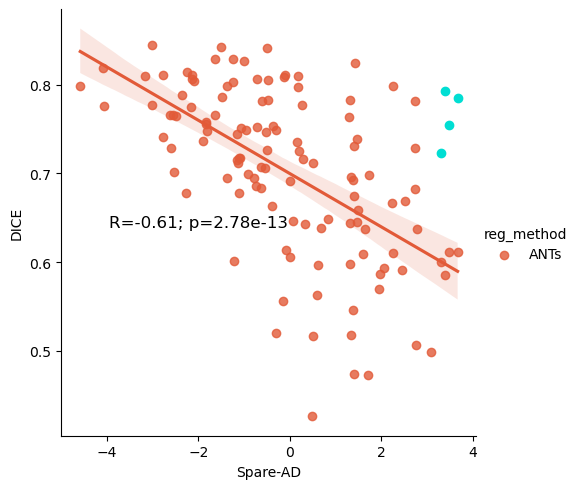

In [2]:
root_path = os.path.dirname(os.path.abspath("Figure-2.ipynb"))
scores = pd.read_csv(os.path.join(root_path, 'Figure-2.csv'))
palette = {"ANTs":"#E25A38", "ANTs+WD":"#00DED3"}
g = sns.lmplot(x="spare_ad", y='dice', hue="reg_method", data=scores.drop(scores.index[scores.reg_method=='ANTs+WD']), palette=palette)
g.set_axis_labels("Spare-AD", "DICE")
axes = g.axes[0,0]
x1 = scores.loc[scores.reg_method=='ANTs', 'spare_ad']
x2 = scores.loc[scores.reg_method=='ANTs', 'dice']
res = stats.spearmanr(x1, x2)
text_kwargs = dict(ha='center', va='center', fontsize=12, color='black')
axes.text(axes.get_xlim()[0]+3, np.mean(axes.get_ylim()), 'R=%.2f; p=%.2e'%(res.statistic,res.pvalue), **text_kwargs)
scatter_data = scores.loc[scores.reg_method=='ANTs+WD'].sort_values(by='spare_ad', ascending=False)[:4]
axes.scatter(scatter_data['spare_ad'], scatter_data['dice'], color=palette['ANTs+WD'])
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-2a.svg'))

/var/folders/jx/cmk_mkc16c99zr1hg6mytzkm0000gn/T/ipykernel_96867/4098572846.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes, x="reg_method", y="dice", data=scores, palette=palette, dodge=False, alpha=.6)


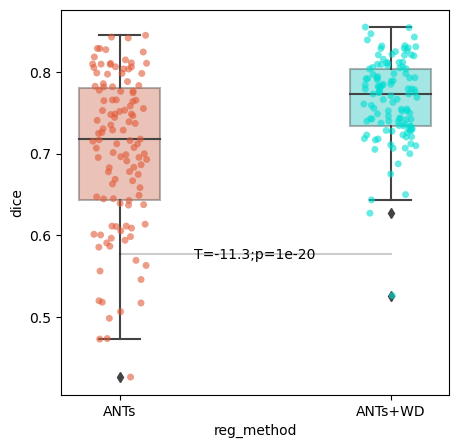

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(ax=axes, x="reg_method", y="dice", data=scores, palette=palette, width=0.3, boxprops={'alpha': 0.4})
sns.stripplot(ax=axes, x="reg_method", y="dice", data=scores, palette=palette, dodge=False, alpha=.6)
x1 = scores.loc[scores.reg_method=="ANTs", "dice"]
x2 = scores.loc[scores.reg_method=="ANTs+WD", "dice"]
res = stats.ttest_rel(x1, x2)
text_kwargs = dict(ha='center', va='center', fontsize=10, color='black')
axes.plot([0,1], [0.9*np.mean(axes.get_ylim())]*2, '-k', alpha=0.2)
axes.text(np.mean([0,1]), 0.9*np.mean(axes.get_ylim()), 'T=%.1f;p=%.0e'%(res.statistic, res.pvalue), **text_kwargs)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-2dall.svg'))

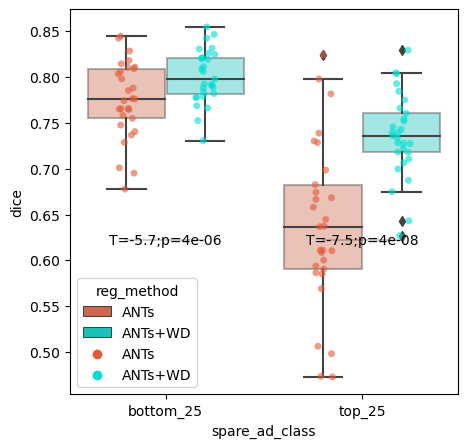

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(ax=axes, x="spare_ad_class", y="dice", hue="reg_method", data=scores.drop(scores.index[scores.spare_ad_class=='middle']), palette=palette, boxprops={'alpha': 0.4})
sns.stripplot(ax=axes, x="spare_ad_class", y="dice", hue="reg_method", data=scores.drop(scores.index[scores.spare_ad_class=='middle']), palette=palette, dodge=True, alpha=.6)
for j,spare_ad_class in enumerate(['bottom_25','top_25']):
    x1 = scores.loc[(scores.reg_method=='ANTs') & (scores.spare_ad_class==spare_ad_class), "dice"]
    x2 = scores.loc[(scores.reg_method=='ANTs+WD') & (scores.spare_ad_class==spare_ad_class), "dice"]
    res = stats.ttest_rel(x1, x2)
    text_kwargs = dict(ha='center', va='center', fontsize=10, color='black')
    axes.plot([j-0.2, j+0.2], [axes.get_ylim()[0]+0.4*np.diff(axes.get_ylim())]*2, '-k', alpha=0.2)
    axes.text(j, axes.get_ylim()[0]+0.4*np.diff(axes.get_ylim()), 'T=%.1f;p=%.0e'%(res.statistic, res.pvalue), **text_kwargs)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-2dsplit.svg'))